# Advanced Supervised Machine Learning

### K-Nearest Neighbour (KNN)

K-Nearest Neighbour is a simple yet powerful **instance-based learning algorithm** used for both classification and regression tasks. Unlike parametric models that learn a function during training, KNN is a **lazy learner** that stores all training data and makes predictions by finding the K closest examples to a new data point.

<span style="color : red">Band 5 & 6 students should understand how KNN makes predictions using distance metrics, the impact of the K value, and the differences between KNN classification and regression.</span>

#### How KNN Works: The Algorithm

```mermaid
graph TD
    A[New Data Point] --> B[Calculate Distance to<br/>All Training Points]
    B --> C[Sort Distances<br/>Ascending Order]
    C --> D[Select K Nearest<br/>Neighbours]
    D --> E{Task Type?}
    E -->|Classification| F[Vote: Most Common<br/>Class Among K]
    E -->|Regression| G[Average: Mean Value<br/>Among K]
    F --> H[Predicted Class]
    G --> I[Predicted Value]
    
    style A fill:#e1f5ff,color:#333
    style B fill:#fff3cd,color:#333
    style C fill:#fff3cd,color:#333
    style D fill:#d4edda,color:#333
    style E fill:#ffeaa7,color:#333
    style F fill:#d4edda,color:#333
    style G fill:#d4edda,color:#333
    style H fill:#f8d7da,color:#333
    style I fill:#f8d7da,color:#333
```

**Key Steps:**

1. **Store Training Data**: KNN stores all training examples (lazy learning)
2. **Calculate Distance**: When a new point arrives, calculate distance to all training points
3. **Find K Nearest**: Select the K closest training examples
4. **Make Prediction**:
   - **Classification**: Majority vote among K neighbours
   - **Regression**: Average (mean) of K neighbours' values

#### Choosing the K Value

The value of K significantly impacts model performance:

| K Value | Behaviour | Advantages | Disadvantages |
| --- | --- | --- | --- |
| K = 1 | Uses only nearest neighbour | Simple, captures fine patterns | Sensitive to noise, overfitting |
| K = 3-5 | Small neighbourhood | Good balance for many problems | May still be affected by noise |
| K = 10-20 | Medium neighbourhood | More stable, less noise sensitive | May miss local patterns |
| K = Large | Uses many neighbours | Smooth decision boundaries | Underfitting, ignores local structure |

```mermaid
graph LR
    A[Small K<br/>e.g., K=1] --> B[Complex Boundaries<br/>High Variance<br/>Overfitting Risk]
    C[Medium K<br/>e.g., K=5-10] --> D[Balanced<br/>Good Generalization]
    E[Large K<br/>e.g., K=50] --> F[Smooth Boundaries<br/>High Bias<br/>Underfitting Risk]
    
    style A fill:#f8d7da,color:#333
    style C fill:#d4edda,color:#333
    style E fill:#fff3cd,color:#333
```

> [!Note]
>
> **Best Practice**: Always use an **odd number** for K in binary classification to avoid ties. Use cross-validation to find the optimal K value for your dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from utils_common import generate_data
import random

In [2]:
# Generate a random data set
m = generate_data(0, 50, 0, 50, 150, 0.4)
n = generate_data(0, 50, 0, 50, 150, 0.45)
o = generate_data(30, 50, 30, 50, 10, 0.1)

cols = [random.randint(0, 1) for _ in range(10)]
radii = [1, 2, 3, 4, 5]


> [!Tip]
> Toggle `zoom = False` below to zoom in and out of KNN to see the algorithm at the local level.

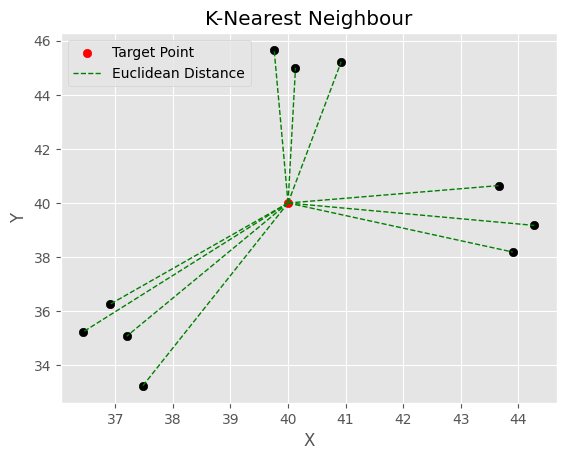

In [3]:
# K-Nearest Neighbour Regression
# Mean of the K-Nearest Neighbours is used as the prediction
zoom = False
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(40, 40, color='red', label='Target Point')
if not zoom:
    plt.scatter(m[0], m[1], color='black')
    plt.scatter(n[0], n[1], color='black')
else:
    plt.scatter(o[0], o[1], color='black')
    plt.plot([],[],color='green', linestyle='--', linewidth=1, label='Euclidean Distance')
    for xi, yi in zip(o[0], o[1]):
        plt.plot([40, xi], [40, yi], color='green', linestyle='--', linewidth=1)
plt.legend(loc='upper left')
plt.title("K-Nearest Neighbour")
plt.show()

> [!Tip]
> Toggle `zoom = False` below to zoom in and out of KNN to see the algorithm at the local level.

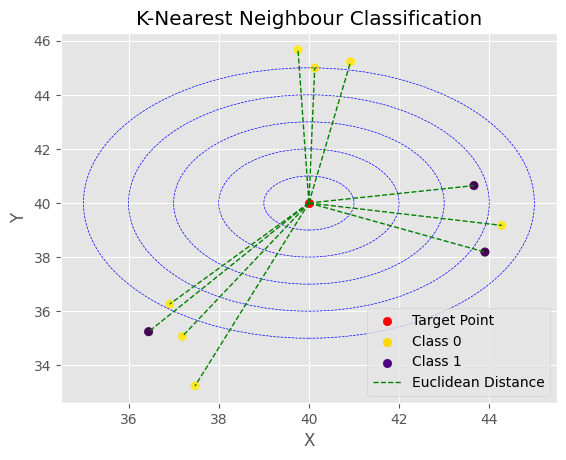

In [4]:
# K-Nearest Neighbour Classification\
# Mode Class of the K-Nearest Neighbours is used as the prediction
zoom = False
fig, ax = plt.subplots()
plt.scatter(40, 40, color='red', label='Target Point')
if not zoom:
    plt.scatter(m[0], m[1], color='gold', label='Class 0')
    plt.scatter(n[0], n[1], color='indigo', label='Class 1')
else:
    plt.scatter([], [], c='gold', label='Class 0')
    plt.scatter([], [], c='indigo', label='Class 1')
    plt.scatter(o[0], o[1], c=cols)
    plt.plot([],[],color='green', linestyle='--', linewidth=1, label='Euclidean Distance')
    for radius in radii:
        circle = Circle((40, 40), radius, color='blue', fill=False, linestyle='--')
        ax.add_patch(circle)
    for xi, yi in zip(o[0], o[1]):
        plt.plot([40, xi], [40, yi], color='green', linestyle='--', linewidth=1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.legend()
plt.title("K-Nearest Neighbour Classification")
plt.show()

#### Measuring Distance

KNN uses either Euclidean distance (straight-line) and Manhattan distance (grid-like, right-angle path) between two points. Although Euclidean distance is the most commenly used measure in KNN.

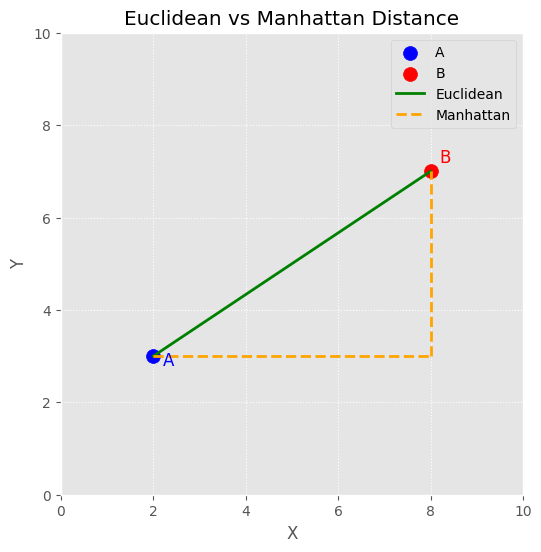

In [5]:
# Visualise Euclidean & Manhattan Distance
A, B = np.array([2, 3]), np.array([8, 7])
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(*A, color='blue', s=100, label='A')
ax.scatter(*B, color='red', s=100, label='B')
# Euclidean (straight line)
ax.plot([A[0], B[0]], [A[1], B[1]], color='green', lw=2, label='Euclidean')
# Manhattan (right-angle path)
ax.plot([A[0], B[0]], [A[1], A[1]], color='orange', ls='--', lw=2)
ax.plot([B[0], B[0]], [A[1], B[1]], color='orange', ls='--', lw=2, label='Manhattan')
ax.annotate('A', A + [0.2, -0.2], fontsize=12, color='blue')
ax.annotate('B', B + [0.2, 0.2], fontsize=12, color='red')
ax.grid(True, linestyle=':')
ax.set(xlim=(0, 10), ylim=(0, 10), aspect='equal', xlabel='X', ylabel='Y', title='Euclidean vs Manhattan Distance')
ax.legend()
plt.show()

### Neural Network Course Specifications

<figure>
    <center><img src="images\NN_Course-Specs.png" alt="Course Specs Neural Network image" width="500" />
    <figcaption><p><em>Source: Page 29 of the Software Engineering Course Specifications</em></p>
    </figcaption></center>
</figure>

Neural networks were designed to mimic the processing inside the human brain. They consist of a series of interconnected nodes (artificial neurones). Each neurone can accept a binary input signal and potentially output another signal to connected nodes.

#### Training cycle

Internal weightings and threshold values for each node are determined in the initial training cycle for each neural network. The system is exposed to a series of inputs with known responses. Linear regression with backward chaining is used to iteratively determine the set of unique values required for output. Regular exposure to the training cycle results in improved accuracy and pattern matching.

#### Execution cycle

In the diagram, signal strength between nodes with the strongest weightings are thicker representing a higher priority in determining the final output. The execution cycle follows the training cycle and utilises the internal values developed during the training cycle to determine the output.

Page 29

### Decision Trees

Decision Trees are a powerful and interpretable supervised learning algorithm that creates a tree-like model of decisions. They work by recursively splitting the data based on feature values, creating a hierarchical structure that mimics human decision-making processes.

<span style="color : red">Band 5 & 6 students should understand how decision trees split data, the concepts of entropy and information gain, and how to interpret tree structures.</span>

#### Decision Tree Structure

```mermaid
graph TD
    A[Root Node<br/>Feature: Age<br/>Age ≤ 30?] -->|Yes| B[Internal Node<br/>Feature: Income<br/>Income ≤ 50K?]
    A -->|No| C[Internal Node<br/>Feature: Credit Score<br/>Score ≤ 650?]
    
    B -->|Yes| D[Leaf Node<br/>Prediction: Deny]
    B -->|No| E[Leaf Node<br/>Prediction: Approve]
    
    C -->|Yes| F[Leaf Node<br/>Prediction: Deny]
    C -->|No| G[Leaf Node<br/>Prediction: Approve]
    
    style A fill:#e1f5ff,color:#333
    style B fill:#fff3cd,color:#333
    style C fill:#fff3cd,color:#333
    style D fill:#f8d7da,color:#333
    style E fill:#d4edda,color:#333
    style F fill:#f8d7da,color:#333
    style G fill:#d4edda,color:#333
```

**Tree Components:**

- **Root Node**: Starting point, contains entire dataset
- **Internal Nodes**: Decision points based on feature tests
- **Branches**: Represent outcomes of tests (Yes/No, or feature ranges)
- **Leaf Nodes**: Terminal nodes containing predictions

#### How Decision Trees Build: The Algorithm

```mermaid
graph TD
    A[Start with<br/>Entire Dataset] --> B[Calculate Impurity<br/>Current Node]
    B --> C[For Each Feature]
    C --> D[Try All Possible<br/>Split Points]
    D --> E[Calculate Information Gain<br/>or Gini Decrease]
    E --> F[Select Best Split<br/>Highest Info Gain]
    F --> G[Split Data into<br/>Left & Right Subsets]
    G --> H{Stopping<br/>Criterion Met?}
    H -->|No| I[Recursively Build<br/>Subtrees]
    I --> B
    H -->|Yes| J[Create Leaf Node<br/>with Prediction]
    
    style A fill:#e1f5ff,color:#333
    style B fill:#fff3cd,color:#333
    style F fill:#d4edda,color:#333
    style H fill:#ffeaa7,color:#333
    style J fill:#f8d7da,color:#333
```

**Key Steps:**

1. **Root Node**: The algorithm starts with the entire dataset
2. **Splitting**: At each node, select the feature and split value that best separates the data, minimizing impurity (entropy or Gini)
3. **Recursion**: Repeat the process for each subset, creating new nodes and branches
4. **Stopping Criteria**: Stop when:
   - Maximum tree depth reached
   - Minimum samples per leaf reached
   - No further information gain possible
   - All samples in node belong to same class
5. **Leaf Nodes**: Terminal nodes contain the final predictions
6. **Prediction**: Follow the path from root to leaf based on feature values

#### Information Gain and Impurity Measures

Decision trees use **impurity measures** to determine the best splits:

| Measure | Formula | Use Case | Range |
| --- | --- | --- | --- |
| **Entropy** | $-\sum p_i \log_2(p_i)$ | ID3, C4.5 algorithms | 0 (pure) to 1 (impure) |
| **Gini Impurity** | $1 - \sum p_i^2$ | CART algorithm (scikit-learn default) | 0 (pure) to 0.5 (impure) |
| **Variance** | $\frac{1}{n}\sum(y_i - \bar{y})^2$ | Regression trees | Varies by data |

**Information Gain** = Impurity(parent) - Weighted Average of Impurity(children)

```mermaid
graph LR
    A[High Entropy<br/>Mixed Classes<br/>Impure] --> B[Split on<br/>Best Feature]
    B --> C[Lower Entropy<br/>More Homogeneous<br/>Purer]
    C --> D[Repeat Until<br/>Pure Leaf Nodes]
    
    style A fill:#f8d7da,color:#333
    style B fill:#fff3cd,color:#333
    style C fill:#d4edda,color:#333
    style D fill:#d4edda,color:#333
```

> [!Note]
>
> The goal is to maximize **Information Gain** at each split, creating subsets that are as pure (homogeneous) as possible.

#### Decision Trees: Advantages and Disadvantages

| Advantages | Disadvantages |
| --- | --- |
| Easy to understand and interpret (white-box model) | Prone to overfitting, especially with deep trees |
| Requires little data preparation (no scaling needed) | Can be unstable (small data changes → different tree) |
| Handles both numerical and categorical data | Biased toward features with more levels |
| Can model non-linear relationships | Greedy algorithm (may not find global optimum) |
| Works with missing values (some implementations) | Can create over-complex trees (poor generalization) |
| Automatic feature selection through splits | Difficulty capturing XOR and other complex patterns |

> [!Important]
>
> **Overfitting Prevention**: Use techniques like pruning, setting max_depth, min_samples_split, and min_samples_leaf to prevent overfitting. Consider using **Random Forests** (ensemble of decision trees) for better generalization.

#### Comparing KNN, Decision Trees, and Neural Networks

| Aspect | K-Nearest Neighbour | Decision Trees | Neural Networks |
| --- | --- | --- | --- |
| **Learning Type** | Lazy (instance-based) | Eager (model-based) | Eager (model-based) |
| **Training Time** | Fast (just stores data) | Moderate (builds tree) | Slow (iterative optimization) |
| **Prediction Time** | Slow (calculates all distances) | Fast (traverses tree) | Fast (forward propagation) |
| **Interpretability** | Low (black box) | High (visual tree) | Very Low (black box) |
| **Feature Scaling** | Required | Not required | Required |
| **Handling Non-linearity** | Good | Excellent | Excellent |
| **Memory Usage** | High (stores all data) | Low (stores tree structure) | Moderate (stores weights) |
| **Overfitting Risk** | Low K → High risk | Deep trees → High risk | Many neurons/layers → High risk |
| **Data Requirements** | Small to medium datasets | Small to medium datasets | Large datasets preferred |
| **Best Use Case** | Small datasets, Pattern recognition | Interpretability needed, Mixed data types | Complex patterns, Large datasets, Image/Text |

> [!Note]
>
> Each algorithm has its strengths: **KNN** for simplicity and small datasets, **Decision Trees** for interpretability and mixed data types, and **Neural Networks** for complex patterns in large datasets.